In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("BostonHousing.csv")
df.shape

(506, 14)

In [2]:
df.dtypes

Crime_rate    float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
Age           float64
Distance      float64
rad             int64
tax             int64
ptratio       float64
b             float64
lstat         float64
medv          float64
dtype: object

In [3]:
df.isnull().sum()


Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            5
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df['rm']=df['rm'].fillna(df['rm'].mean())

In [6]:
df.isnull().sum()

Crime_rate    0
zn            0
indus         0
chas          0
nox           0
rm            0
Age           0
Distance      0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crime_rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284341,0.702085,3.56100,5.885500,6.21000,6.618750,8.7800
Age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
Distance,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


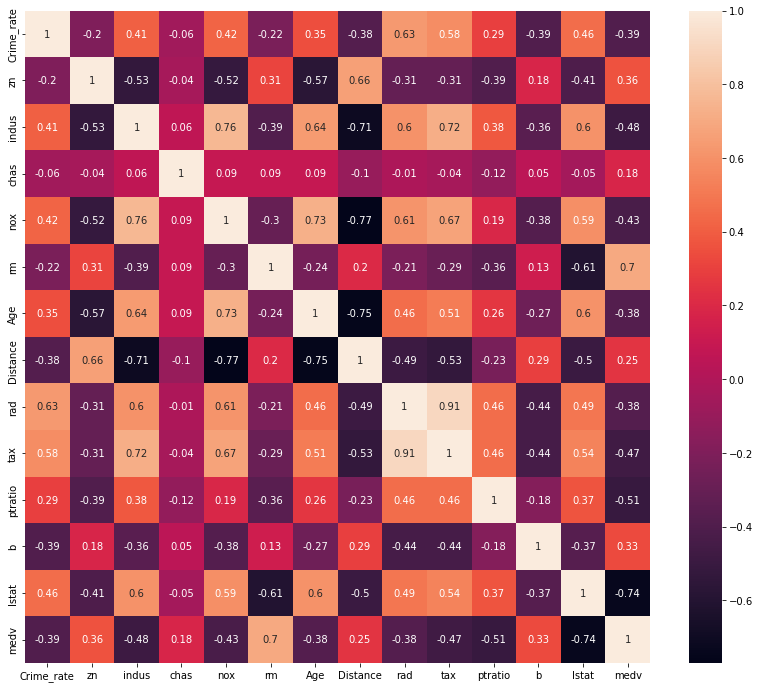

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [20]:
X = df.drop(['medv'], axis=1)
y = df['medv']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat
220,0.35809,0.0,6.20,1,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71
71,0.15876,0.0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88
240,0.11329,30.0,4.93,0,0.428,6.897,54.3,6.3361,6,300,16.6,391.25,11.38
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predict = model.predict(X_train)


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_predict)
r2 = r2_score(y_train, y_predict)

print(f"Mean Sqaured Error: {mse}")
print(f"R2 Score: {r2}")

Mean Sqaured Error: 20.964852801569855
R2 Score: 0.7337245792181941


In [27]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("##The model performance for training set")
print("")
print('- RMSE is {}'.format(rmse))
print('- R2 score is {}'.format(r2))
print("\n")

y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("##The model performance for testing set")
print("")
print('- RMSE is {}'.format(rmse))
print('- R2 score is {}'.format(r2))

##The model performance for training set

- RMSE is 4.4035901870740535
- R2 score is 0.7722485406464419


##The model performance for testing set

- RMSE is 5.7848920464356475
- R2 score is 0.5890259426012647


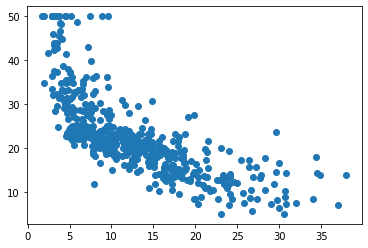

In [14]:
# lstat vs medv 
plt.scatter(df['lstat'],df['medv'],marker='o')

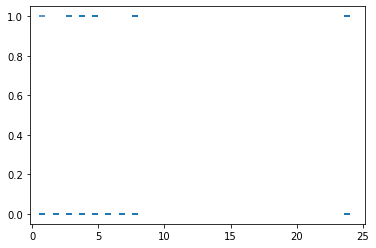

In [16]:
# nearly 0 correlation coefficient
plt.scatter(df['rad'],df['chas'],marker=0)

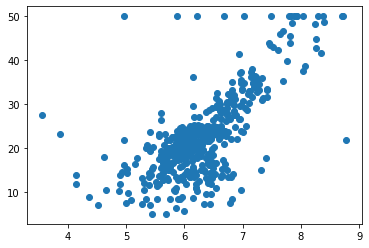

In [15]:
# lstat vs medv 
plt.scatter(df['rm'],df['medv'],marker='o')

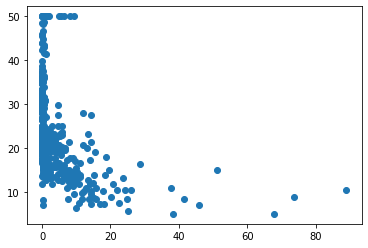

In [28]:
# crime rate vs medv 
plt.scatter(df['Crime_rate'],df['medv'],marker='o')

In [34]:

X= df.drop(['medv'],axis=1)
Y = df['medv']

from sklearn.model_selection import train_test_split 
 
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size =0.2)
  
print("xtrain shape : ", xtrain.shape)
print("xtest shape  : ", xtest.shape)
print("ytrain shape : ", ytrain.shape)
print("ytest shape  : ", ytest.shape)



xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

print(xtrain.shape, "  ==  ", ytrain.shape)

(404, 13)   ==   (404,)


In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
  
y_pred = reg.predict(xtest)

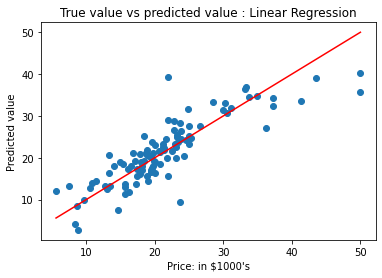

In [37]:
plt.scatter(ytest, y_pred)

ideal_values = np.linspace(min(ytest), max(ytest))  
plt.plot(ideal_values, ideal_values, color='red')

plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
print('MSE:', metrics.mean_squared_error(ytest, y_pred))
print("r2 score: ",metrics.r2_score(ytest, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

MAE: 3.1146873968963185
MSE: 18.86407892673959
r2 score:  0.7135734721984255
RMSE: 4.343279743090421


In [ ]:
#  vs medv 
plt.scatter(df['Crime_rate'],df['medv'],marker='o')